libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/home/sudhanshu/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - accuracy: 0.6788 - loss: 0.6743 - val_accuracy: 0.8841 - val_loss: 0.3126
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - accuracy: 0.8821 - loss: 0.3138 - val_accuracy: 0.9116 - val_loss: 0.2162
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - accuracy: 0.9202 - loss: 0.2170 - val_accuracy: 0.9131 - val_loss: 0.2116
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - accuracy: 0.9257 - loss: 0.2006 - val_accuracy: 0.9162 - val_loss: 0.2057
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - accuracy: 0.9356 - loss: 0.1668 - val_accuracy: 0.9284 - val_loss: 0.1912
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.9391 - loss: 0.1596 - val_accuracy: 0.9284 - val_loss: 0.1716
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.9541 - loss: 0.1253 - val_accuracy: 0.9238 - val_loss: 0.1615
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9553 - loss: 0.1202 - val_accu

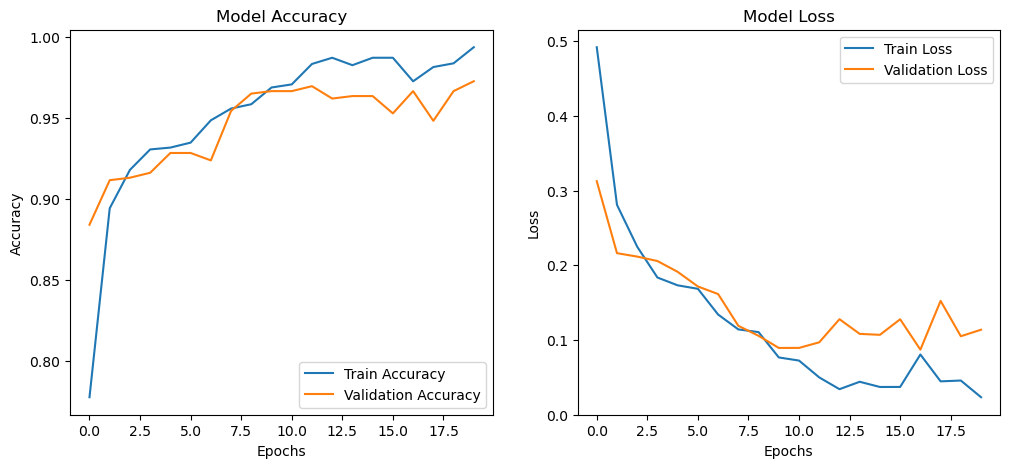

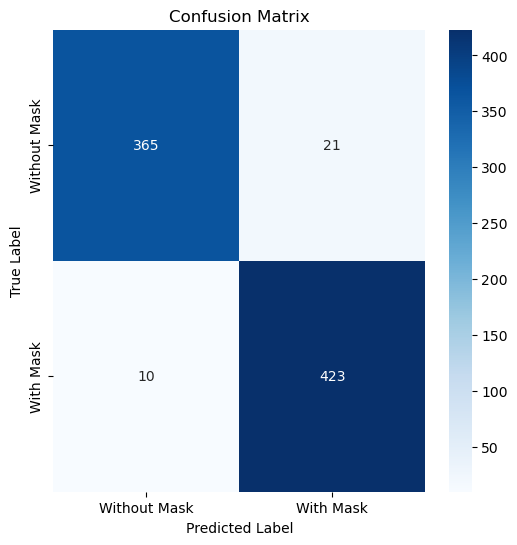

Model saved as 'mask_detector_model.h5'


In [3]:
# Import Libraries
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Paths to dataset
dataset_dir = '/home/sudhanshu/Desktop/cv_project/dataset'  
with_mask_dir = os.path.join(dataset_dir, 'with_mask')
without_mask_dir = os.path.join(dataset_dir, 'without_mask')

# Load Data and Labels
data, labels = [], []

# Load images with mask
for img_name in os.listdir(with_mask_dir):
    img_path = os.path.join(with_mask_dir, img_name)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (128, 128))
    data.append(image)
    labels.append(1)  # 1 for 'with mask'

# Load images without mask
for img_name in os.listdir(without_mask_dir):
    img_path = os.path.join(without_mask_dir, img_name)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (128, 128))
    data.append(image)
    labels.append(0)  # 0 for 'without mask'

# Convert to numpy arrays and scale
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Without Mask", "With Mask"]))

# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Without Mask", "With Mask"], yticklabels=["Without Mask", "With Mask"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Save the model
model.save("mask_detector_model.h5")
print("Model saved as 'mask_detector_model.h5'")
